# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

diabetes = pd.read_csv('diabetes_clean.csv')
diabetes

,Unnamed: 0,ID,No_Pation,Gender,Age,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [3]:
diabetes.info()
diabetes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   ID          1000 non-null   int64  
 2   No_Pation   1000 non-null   int64  
 3   Gender      1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Urea        1000 non-null   float64
 6   Cr          1000 non-null   int64  
 7   HbA1c       1000 non-null   float64
 8   Chol        1000 non-null   float64
 9   TG          1000 non-null   float64
 10  HDL         1000 non-null   float64
 11  LDL         1000 non-null   float64
 12  VLDL        1000 non-null   float64
 13  BMI         1000 non-null   float64
 14  Class       1000 non-null   object 
dtypes: float64(8), int64(5), object(2)
memory usage: 117.3+ KB


,Unnamed: 0,ID,No_Pation,Age,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,288.819436,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,0.000000,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,249.750000,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,499.500000,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,749.250000,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,999.000000,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

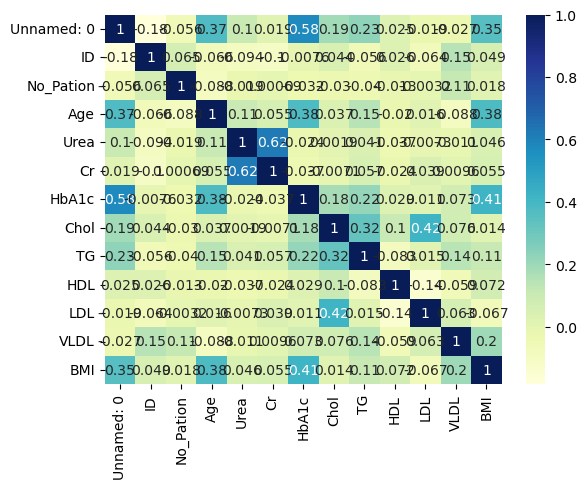

In [4]:
# Since there are so many different variables with no defined dependent variable, 
# a heatmap seems best to find correlations.
sns.heatmap(diabetes.corr(), cmap='YlGnBu', annot=True)
plt.show()

# Appears that Creatinine and Urea levels have the best correlation, which makes sense since they both measure kidney function

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [5]:
# Assign x and y
x = diabetes['Cr']
y = diabetes['Urea']

# Create train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size =0.7,
                                                   test_size=0.3, random_state=100)

# Look at the train dataset
x_train
y_train

420     5.6
278     3.8
218     4.1
363     3.0
850     5.9
       ... 
855    10.3
871     4.3
835     7.1
792     4.9
520     4.1
Name: Urea, Length: 700, dtype: float64

In [6]:
# Build the model
# Adding a constant to get an intercept for regression line
x_train_sm = sm.add_constant(x_train)

# Fitting the regression line using 'OLS'
lr = sm.OLS(y_train, x_train_sm).fit()

# Print the parameters
lr.params

const    3.137483
Cr       0.029216
dtype: float64

In [7]:
# Summary to list out all the different parameters of the regression line
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     404.1
Date:                Wed, 07 Jun 2023   Prob (F-statistic):           2.97e-71
Time:                        11:31:54   Log-Likelihood:                -1614.8
No. Observations:                 700   AIC:                             3234.
Df Residuals:                     698   BIC:                             3243.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1375      0.138     22.749      0.000       2.867       3.408
Cr             0.0292      0.001     20.101      0.000       0.026       0.032
==============================================================================
Omnibus:                      799.293   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           113202.707
Skew:                           5.221   Prob(JB):                         0.00
Kurtosis:                      64.418   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

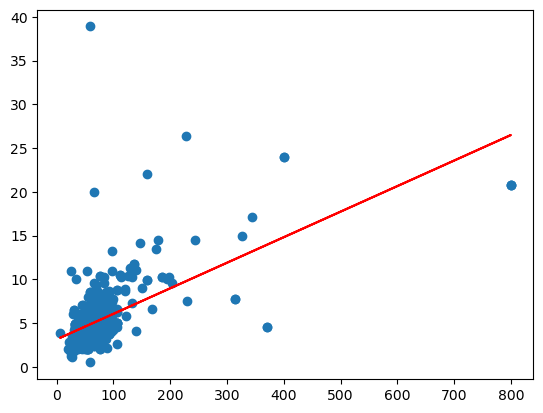

In [8]:
# Plot the regression line
plt.scatter(x_train, y_train)
plt.plot(x_train, 3.1375 + 0.0292*x_train, 'r')
plt.show()

In [9]:
# Perform residual analysis
# Predicting y_values using the training data of x
y_train_pred = lr.predict(x_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

## Error Terms

Finally, plot your error terms!

C:\Users\danad\AppData\Local\Temp\ipykernel_16956\4152333118.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


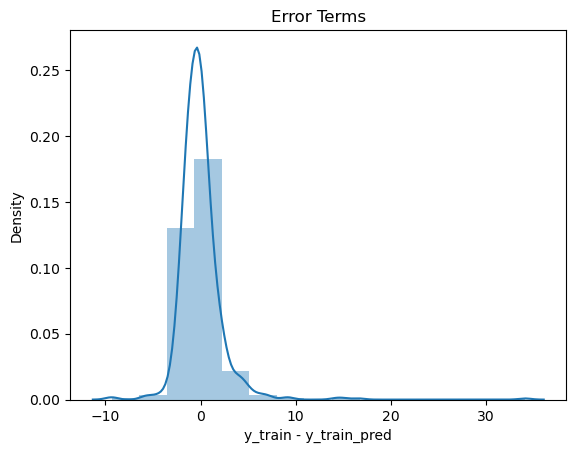

In [13]:
# Plot the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms')
plt.xlabel('y_train - y_train_pred')
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.367
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? A linear model did not match this data. It was grouped together too much to have great linear correlation and had a terrible r-squared value, however it is significant due to the p-value.
3. Was your plot of the error terms a bell curve? Sort of, but not particularly.